In [ ]:
#Import Libraries
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from scipy.stats import mode
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [ ]:
df=pd.read_csv("ckd.csv")
#reading the data

In [ ]:
df.head(10)
#SHOWING TOP 10 ROWS

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44.0,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38.0,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31.0,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35.0,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,0.0,0.0,...,39.0,7800,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1
6,6,68.0,70.0,1.010,0.0,0.0,NaN,1.0,0.0,0.0,...,36.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
7,7,24.0,NaN,1.015,2.0,4.0,1.0,0.0,0.0,0.0,...,44.0,6900,5,0.0,1.0,0.0,1.0,1.0,0.0,1
8,8,52.0,100.0,1.015,3.0,0.0,1.0,0.0,1.0,0.0,...,33.0,9600,4,1.0,1.0,0.0,1.0,0.0,1.0,1
9,9,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,...,29.0,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1


In [ ]:
df.tail(10)
#showing last 10 rows

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
390,390,52.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,52.0,6300,5.3,0.0,0.0,0.0,1.0,0.0,0.0,0
391,391,36.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,44.0,5800,6.3,0.0,0.0,0.0,1.0,0.0,0.0,0
392,392,57.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,46.0,6600,5.5,0.0,0.0,0.0,1.0,0.0,0.0,0
393,393,43.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54.0,7400,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
394,394,50.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,45.0,9500,4.6,0.0,0.0,0.0,1.0,0.0,0.0,0
395,395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,47.0,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54.0,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,49.0,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,51.0,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0
399,399,58.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,53.0,6800,6.1,0.0,0.0,0.0,1.0,0.0,0.0,0


In [ ]:
df.isnull().sum()

id                         0
age                        9
bloodpressure             12
specificgravity           47
albumin                   46
sugar                     49
redbloodcells            152
puscell                   65
puscellclumps              4
bacteria                   4
bloodglucoserandom        44
bloodurea                 19
serumcreatinine           17
sodium                    87
potassium                 88
haemoglobin               52
packedcellvolume          71
whitebloodcellcount      105
redbloodcellcount        130
hypertension               2
diabetesmellitus           2
coronaryarterydisease      2
appetite                   1
pedaledema                 1
anemia                     1
classification             0
dtype: int64

We Can see that there are some NaN values in the dataset.
So we have to remove that.
For that we are using backward fillna method.

In [ ]:
df=df.bfill(axis ='rows') 

In [ ]:
df.describe()

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,potassium,haemoglobin,packedcellvolume,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.00000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.580000,76.35000,1.017175,1.072500,0.495000,0.750000,0.762500,0.105000,0.055000,...,4.569000,12.388500,38.12750,0.367500,0.34250,0.085000,0.795000,0.190000,0.150000,0.625000
std,115.614301,17.101455,13.73496,0.005699,1.377311,1.130562,0.433555,0.426084,0.306937,0.228266,...,2.846858,2.865265,8.98209,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,2.000000,50.00000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.500000,3.100000,9.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.00000,1.010000,0.000000,0.000000,0.750000,1.000000,0.000000,0.000000,...,3.800000,10.400000,32.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,80.00000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,4.400000,12.500000,39.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,299.250000,65.000000,80.00000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,4.900000,14.800000,44.25000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.00000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,47.000000,17.800000,54.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head()

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,...,44.0,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,...,38.0,6000,3.9,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31.0,7500,3.9,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35.0,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
df[30:80]

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
30,30,73.0,70.0,1.015,3.0,0.0,0.0,0.0,0.0,0.0,...,30.0,7800,4,1.0,1.0,0.0,1.0,0.0,0.0,1
31,31,73.0,90.0,1.015,3.0,0.0,0.0,0.0,1.0,0.0,...,30.0,7800,4,0.0,0.0,0.0,0.0,0.0,0.0,1
32,32,61.0,90.0,1.010,1.0,1.0,0.0,1.0,0.0,0.0,...,34.0,9600,4,1.0,1.0,0.0,0.0,0.0,0.0,1
33,33,60.0,100.0,1.020,2.0,0.0,0.0,0.0,0.0,0.0,...,29.0,9800,4.9,1.0,0.0,0.0,0.0,0.0,0.0,1
34,34,70.0,70.0,1.010,1.0,0.0,1.0,1.0,1.0,1.0,...,36.0,9800,4.9,0.0,1.0,0.0,0.0,0.0,0.0,1
35,35,65.0,90.0,1.020,2.0,1.0,0.0,1.0,0.0,0.0,...,36.0,9800,4.9,1.0,1.0,0.0,0.0,0.0,1.0,1
36,36,76.0,70.0,1.015,1.0,0.0,1.0,1.0,0.0,0.0,...,32.0,6900,2.5,1.0,0.0,0.0,1.0,0.0,0.0,1
37,37,72.0,80.0,1.020,3.0,0.0,0.0,1.0,0.0,0.0,...,28.0,6900,2.5,1.0,1.0,0.0,0.0,0.0,1.0,1
38,38,69.0,80.0,1.020,3.0,0.0,0.0,1.0,0.0,0.0,...,40.0,9800,4.2,1.0,0.0,0.0,1.0,0.0,0.0,1
39,39,82.0,80.0,1.010,2.0,2.0,1.0,0.0,0.0,0.0,...,40.0,9800,4.2,1.0,1.0,0.0,1.0,0.0,0.0,1


In [ ]:
df.isnull().sum()

id                       0
age                      0
bloodpressure            0
specificgravity          0
albumin                  0
sugar                    0
redbloodcells            0
puscell                  0
puscellclumps            0
bacteria                 0
bloodglucoserandom       0
bloodurea                0
serumcreatinine          0
sodium                   0
potassium                0
haemoglobin              0
packedcellvolume         0
whitebloodcellcount      0
redbloodcellcount        0
hypertension             0
diabetesmellitus         0
coronaryarterydisease    0
appetite                 0
pedaledema               0
anemia                   0
classification           0
dtype: int64

In [ ]:
df.dtypes

id                         int64
age                      float64
bloodpressure            float64
specificgravity          float64
albumin                  float64
sugar                    float64
redbloodcells            float64
puscell                  float64
puscellclumps            float64
bacteria                 float64
bloodglucoserandom       float64
bloodurea                float64
serumcreatinine          float64
sodium                   float64
potassium                float64
haemoglobin              float64
packedcellvolume         float64
whitebloodcellcount       object
redbloodcellcount         object
hypertension             float64
diabetesmellitus         float64
coronaryarterydisease    float64
appetite                 float64
pedaledema               float64
anemia                   float64
classification             int64
dtype: object

We can see that the the NaN values have been countered .But in the dataypes,there are 2 columns(whitebloodcellcount,redbloodcellcount) which are of the type objects.
We have to counter them as well.

In [ ]:

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.dtypes

id                         int64
age                      float64
bloodpressure            float64
specificgravity          float64
albumin                  float64
sugar                    float64
redbloodcells            float64
puscell                  float64
puscellclumps            float64
bacteria                 float64
bloodglucoserandom       float64
bloodurea                float64
serumcreatinine          float64
sodium                   float64
potassium                float64
haemoglobin              float64
packedcellvolume         float64
whitebloodcellcount        int64
redbloodcellcount          int64
hypertension             float64
diabetesmellitus         float64
coronaryarterydisease    float64
appetite                 float64
pedaledema               float64
anemia                   float64
classification             int64
dtype: object

In [ ]:
df.describe()

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.00000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.580000,76.35000,1.017175,1.072500,0.495000,0.750000,0.762500,0.105000,0.055000,...,38.12750,52.947500,24.207500,0.367500,0.34250,0.085000,0.795000,0.190000,0.150000,0.625000
std,115.614301,17.101455,13.73496,0.005699,1.377311,1.130562,0.433555,0.426084,0.306937,0.228266,...,8.98209,27.134396,9.925509,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,2.000000,50.00000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.00000,1.010000,0.000000,0.000000,0.750000,1.000000,0.000000,0.000000,...,32.00000,32.750000,17.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,80.00000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,39.00000,60.000000,24.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,299.250000,65.000000,80.00000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,44.25000,74.000000,31.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.00000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,54.00000,91.000000,45.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


So now this is our final dataset(df1) after pre-processing.
So this data can be carried out to buld our model and mke predictions 


Let us normalise the data,

In [ ]:
a=df.max()
a
#Maximum Values of each attribute are being displayed

id                       399.000
age                       90.000
bloodpressure            180.000
specificgravity            1.025
albumin                    5.000
sugar                      5.000
redbloodcells              1.000
puscell                    1.000
puscellclumps              1.000
bacteria                   1.000
bloodglucoserandom       490.000
bloodurea                391.000
serumcreatinine           76.000
sodium                   163.000
potassium                 47.000
haemoglobin               17.800
packedcellvolume          54.000
whitebloodcellcount       91.000
redbloodcellcount         45.000
hypertension               1.000
diabetesmellitus           1.000
coronaryarterydisease      1.000
appetite                   1.000
pedaledema                 1.000
anemia                     1.000
classification             1.000
dtype: float64

In [ ]:
b=df.min()
b
#minimum values of each attribute are displayed

id                        0.000
age                       2.000
bloodpressure            50.000
specificgravity           1.005
albumin                   0.000
sugar                     0.000
redbloodcells             0.000
puscell                   0.000
puscellclumps             0.000
bacteria                  0.000
bloodglucoserandom       22.000
bloodurea                 1.500
serumcreatinine           0.400
sodium                    4.500
potassium                 2.500
haemoglobin               3.100
packedcellvolume          9.000
whitebloodcellcount       0.000
redbloodcellcount         0.000
hypertension              0.000
diabetesmellitus          0.000
coronaryarterydisease     0.000
appetite                  0.000
pedaledema                0.000
anemia                    0.000
classification            0.000
dtype: float64

In [ ]:
#normalised data
n=(df-b)/(a-b)
n

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
0,0.000000,0.522727,0.230769,0.75,0.2,0.0,1.0,1.0,0.0,0.0,...,0.777778,0.791209,0.688889,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.002506,0.056818,0.000000,0.75,0.8,0.0,1.0,1.0,0.0,0.0,...,0.644444,0.615385,0.400000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.005013,0.681818,0.230769,0.25,0.4,0.6,1.0,1.0,0.0,0.0,...,0.488889,0.769231,0.400000,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.007519,0.522727,0.153846,0.00,0.8,0.0,1.0,0.0,1.0,0.0,...,0.511111,0.681319,0.400000,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.010025,0.556818,0.230769,0.25,0.4,0.0,1.0,1.0,0.0,0.0,...,0.577778,0.747253,0.555556,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.989975,0.602273,0.230769,0.75,0.0,0.0,1.0,1.0,0.0,0.0,...,0.844444,0.681319,0.622222,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,0.992481,0.454545,0.153846,1.00,0.0,0.0,1.0,1.0,0.0,0.0,...,1.000000,0.791209,0.911111,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,0.994987,0.113636,0.230769,0.75,0.0,0.0,1.0,1.0,0.0,0.0,...,0.888889,0.670330,0.733333,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,0.997494,0.170455,0.076923,1.00,0.0,0.0,1.0,1.0,0.0,0.0,...,0.933333,0.736264,0.844444,0.0,0.0,0.0,1.0,0.0,0.0,0.0


DATA VISUALISATION

Let us visualise the data by plotting various Graphs and charts

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

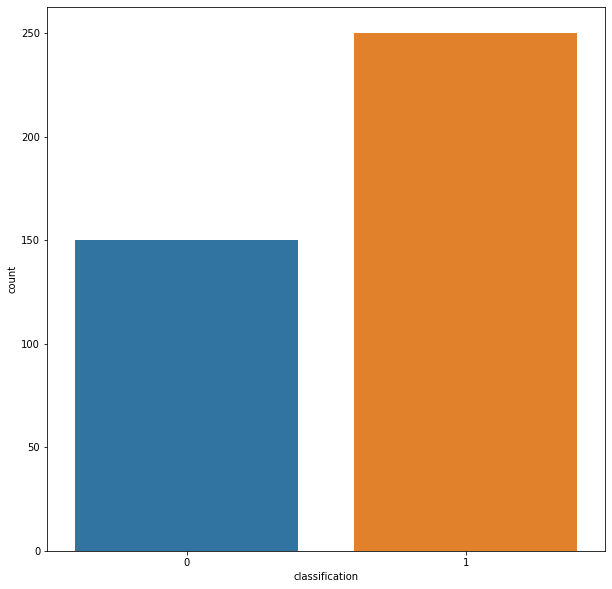

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(x ='classification', data = df)
plt.show()

We can see that there are 250 out 400 kidney patients in our dataset

Let us find the number of Diabetic patients in our dataset

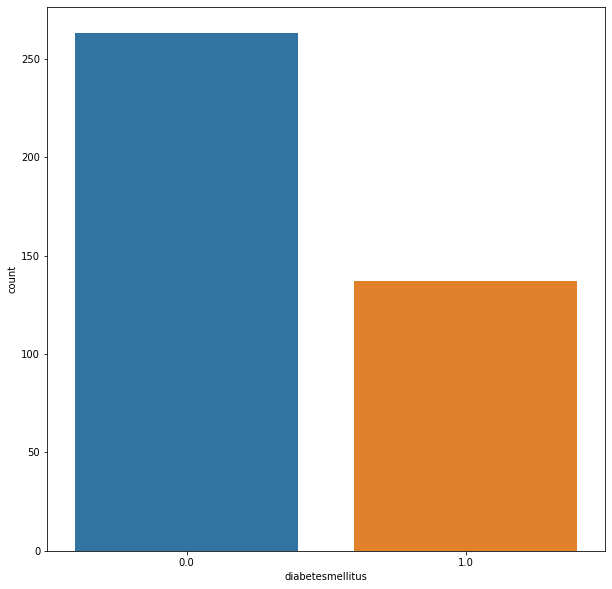

In [ ]:

plt.figure(figsize=(10, 10))
sns.countplot(x ='diabetesmellitus', data = df)
plt.show()

We can observe that 140 people are diabetic

Let us find the number of heart patients in our dataset

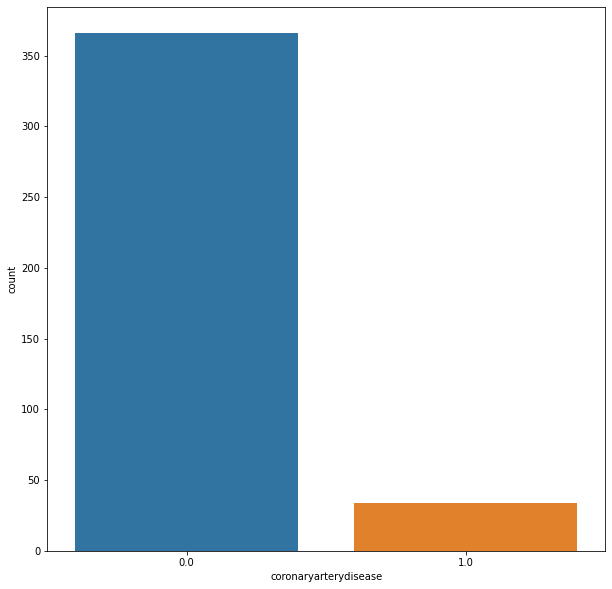

In [ ]:

plt.figure(figsize=(10, 10))
sns.countplot(x ='coronaryarterydisease', data = df)
plt.show()

We can observe that there are 30 heart patients in our dataset 

Let us Visualise Blood Pressure in our dataset

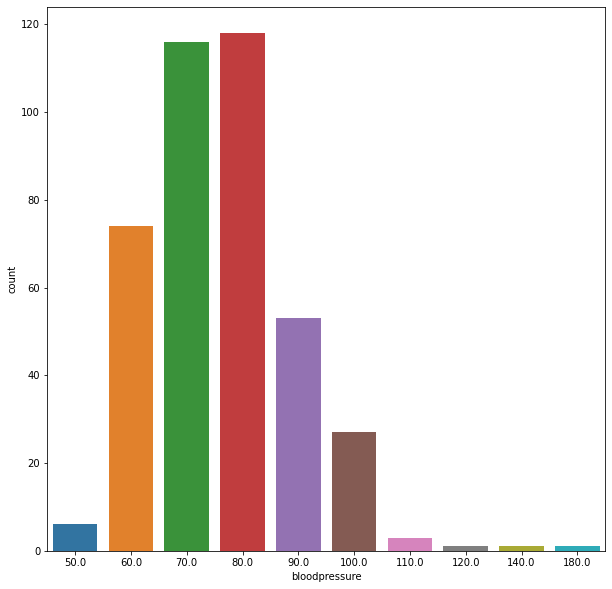

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(x ='bloodpressure', data = df)
plt.show()

Now Let us Visualise age vs CKD In terms of hue graph

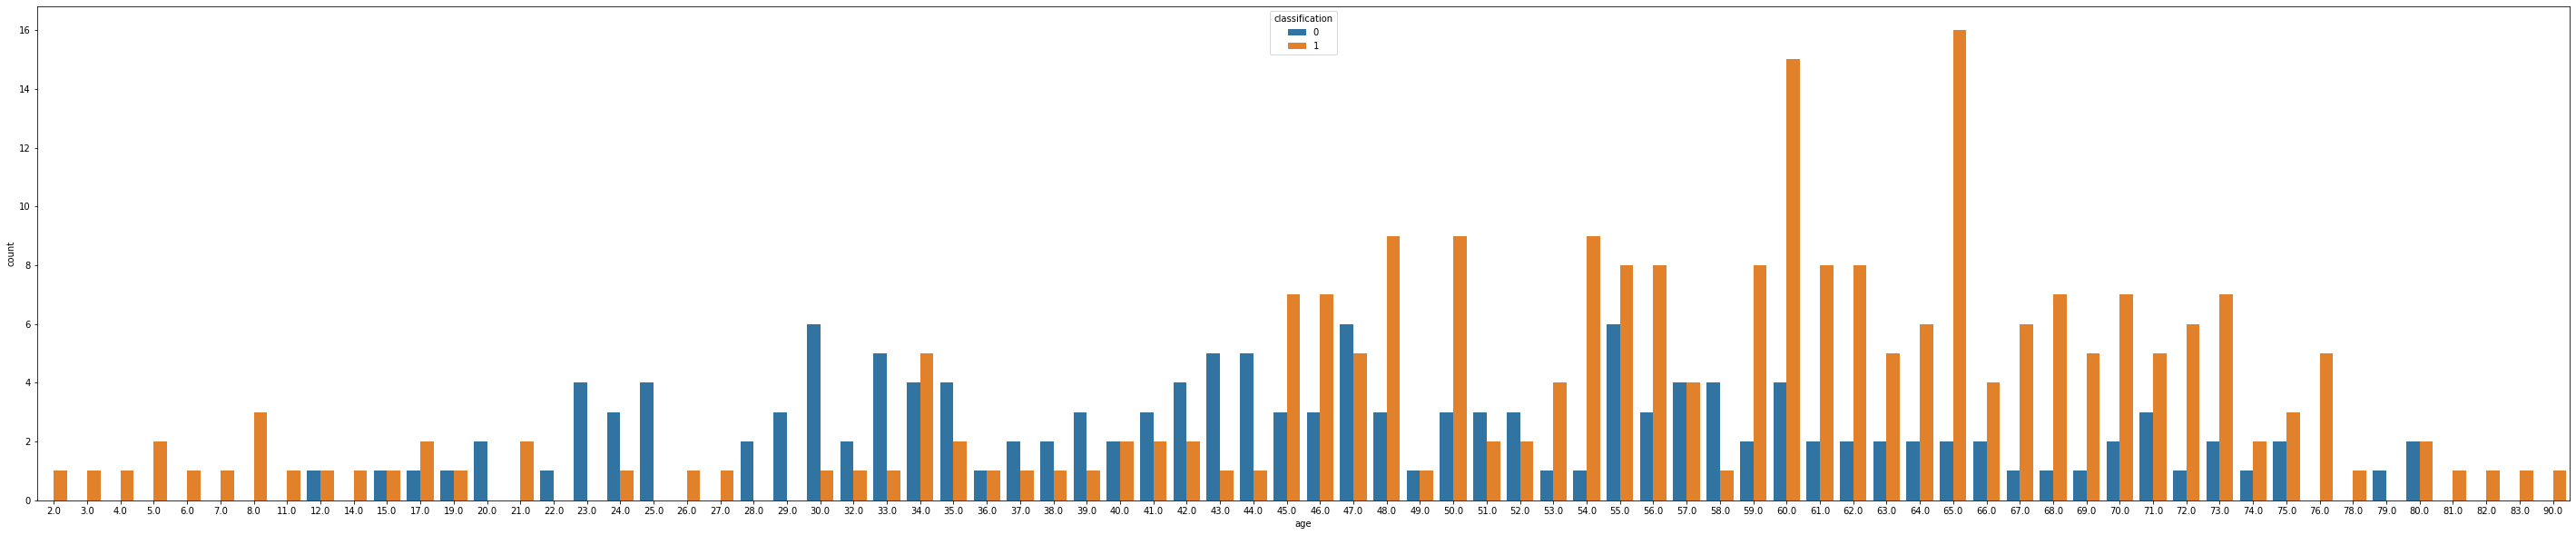

In [ ]:
plt.figure(figsize=(50, 10))
sns.countplot(x ='age', data = df,hue='classification')
plt.show()

Now Let us Visualise blood pressure vs CKD In terms of hue graph

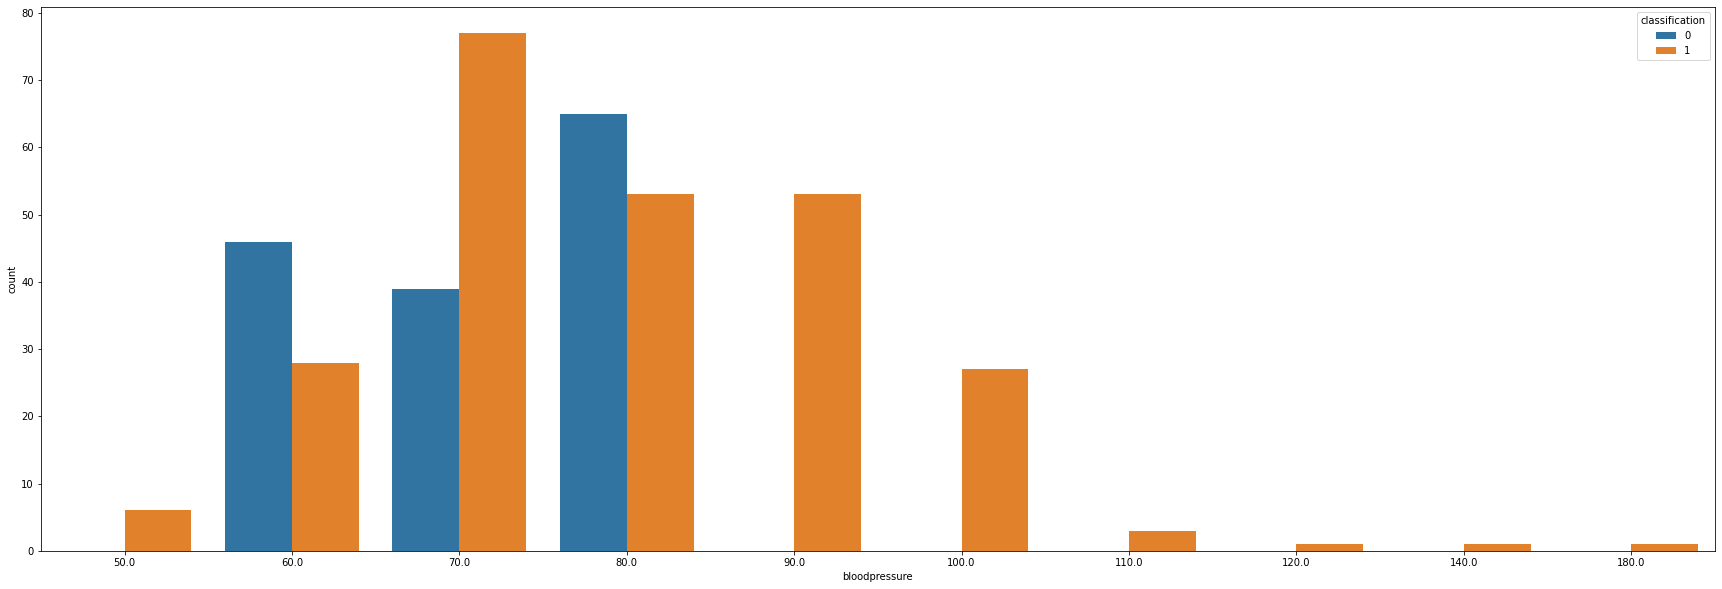

In [ ]:
plt.figure(figsize=(30, 10))
sns.countplot(x ='bloodpressure', data = df,hue='classification')
plt.show()

Numerical data is a type of data that is expressed in terms of numbers rather than natural language descriptions. Similar to its name, numerical, it can only be collected in number form. Also known as quantitative data, this numerical data type can be used as a form of measurement, such as a person’s height, weight, IQ, etc.

Categorical data is a type of data that is used to group information with similar characteristics while Numerical data is a type of data that expresses information in the form of numbers. It combines numeric values to depict relevant information while categorical data uses a descriptive approach to express information

In [ ]:
numericalFeatures = []
categoricalFeatures = []

In [ ]:
for i in df.columns:
    if df[i].nunique()>=9:
        numericalFeatures.append(i)
    else:
        categoricalFeatures.append(i)

 DISTRIBUTION OF NUMERICAL FEATURES

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

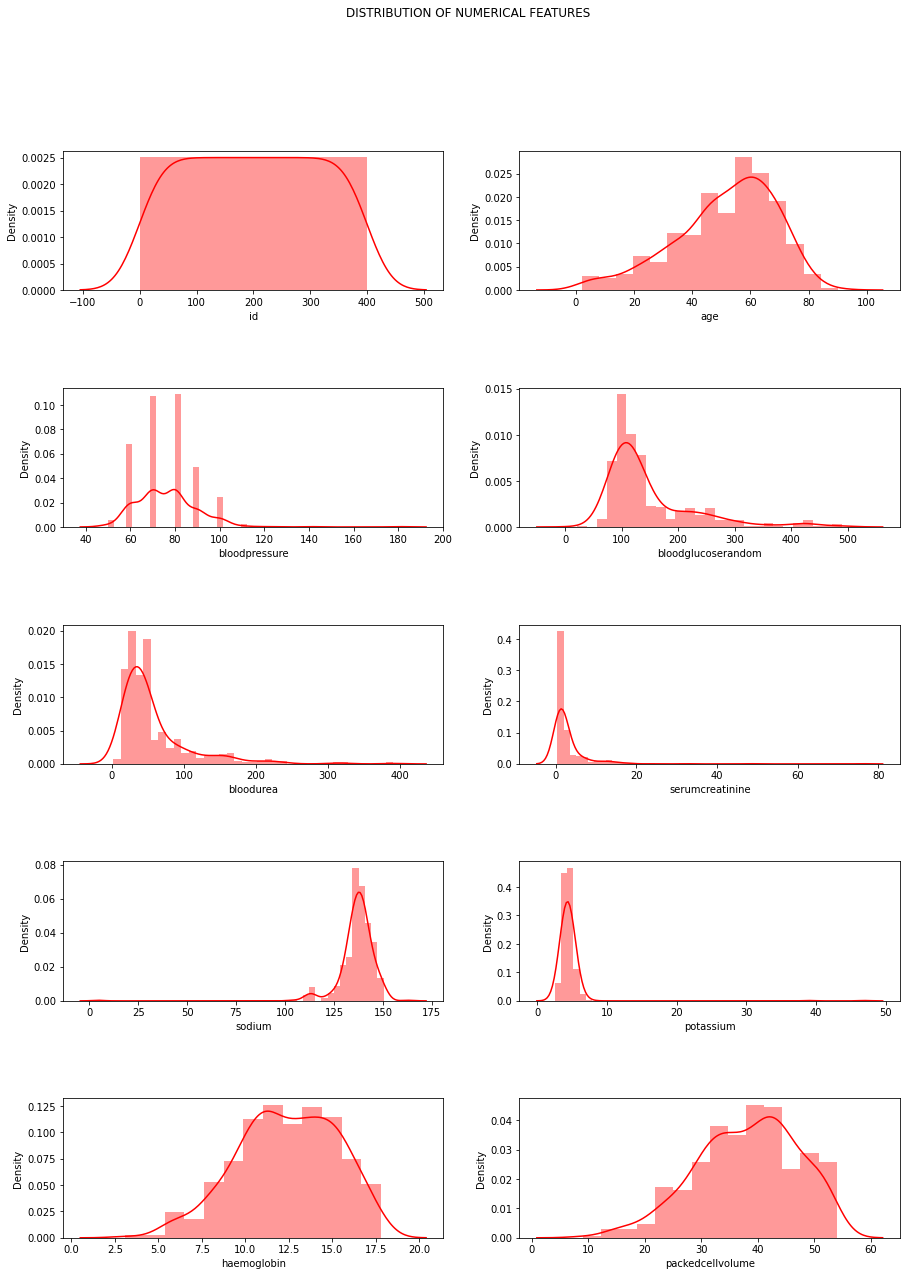

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,20))
fig.subplots_adjust(hspace=0.7)
fig.suptitle('DISTRIBUTION OF NUMERICAL FEATURES')
for ax, feats in zip(axes.flatten(), numericalFeatures):
    sns.distplot(a=df[feats], ax=ax,color='red')


CONCLUSIONS FROM THE ABOVE PLOTS:


1)age looks a bit left skewed

2)Blood gluscose random is right skewed

3)Blood Urea is also a bit right skewed

DISTRIBUTION OF NUMERICAL FEATURES

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

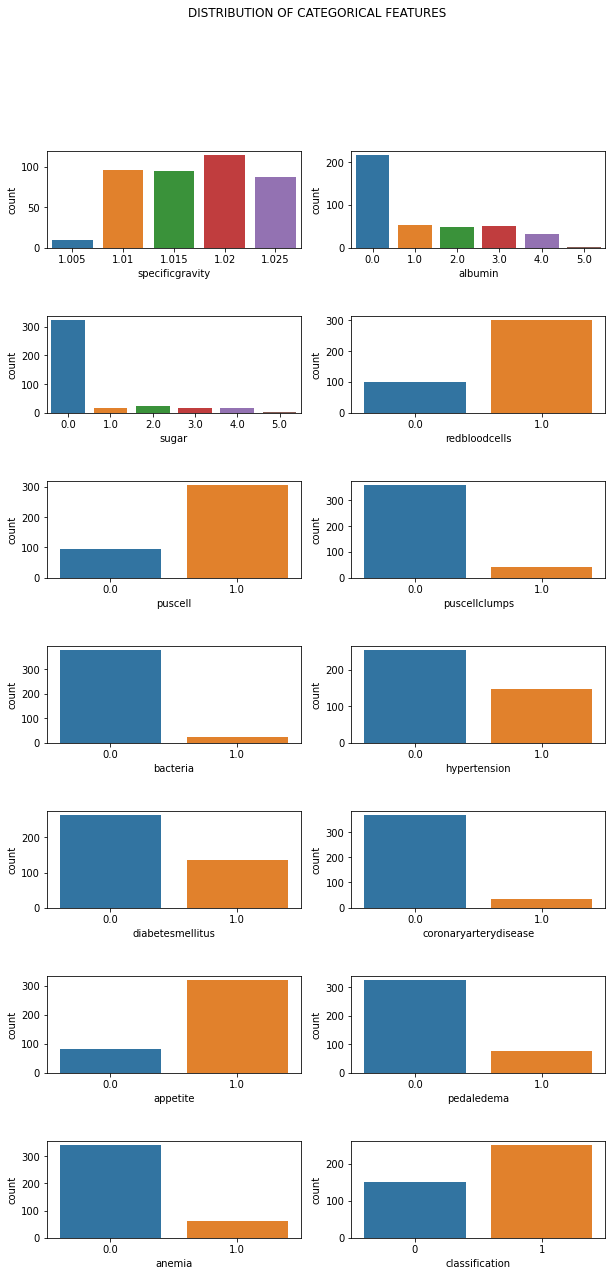

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
fig.subplots_adjust(hspace=0.7)
fig.suptitle('DISTRIBUTION OF CATEGORICAL FEATURES')
for ax, feats in zip(axes.flatten(), categoricalFeatures):
    sns.countplot(df[feats], ax=ax)

HEATMAP

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.It is used to show the correlation among the data.

,id,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,classification
id,1.000000,-0.192566,-0.251217,0.611089,-0.511674,-0.273331,0.395501,0.406226,-0.264142,-0.115955,...,0.592233,0.066214,0.558981,-0.520089,-0.475106,-0.205575,0.374394,-0.308120,-0.273096,-0.838528
age,-0.192566,1.000000,0.163751,-0.210610,0.133132,0.202630,-0.078760,-0.133763,0.155960,0.041886,...,-0.239922,0.036074,-0.153236,0.400967,0.370296,0.229504,-0.151713,0.093993,0.061160,0.236127
bloodpressure,-0.251217,0.163751,1.000000,-0.173693,0.131935,0.232853,-0.237796,-0.182759,0.061412,0.112154,...,-0.277585,-0.010939,-0.192429,0.278419,0.238125,0.087632,-0.180258,0.077766,0.208749,0.287039
specificgravity,0.611089,-0.210610,-0.173693,1.000000,-0.440037,-0.295896,0.327140,0.357778,-0.259846,-0.198158,...,0.548345,0.144424,0.481177,-0.377839,-0.433161,-0.155848,0.221253,-0.285849,-0.222038,-0.720167
albumin,-0.511674,0.133132,0.131935,-0.440037,1.000000,0.253735,-0.250778,-0.500153,0.355444,0.330071,...,-0.537004,-0.142471,-0.485837,0.513953,0.394725,0.296740,-0.310875,0.437742,0.329052,0.603927
sugar,-0.273331,0.202630,0.232853,-0.295896,0.253735,1.000000,-0.161064,-0.213185,0.124298,0.088473,...,-0.259947,-0.063692,-0.224483,0.308763,0.486089,0.231582,-0.068061,0.137595,0.119672,0.339571
redbloodcells,0.395501,-0.078760,-0.237796,0.327140,-0.250778,-0.161064,1.000000,0.288301,-0.084751,-0.063311,...,0.331285,0.074724,0.302126,-0.206571,-0.240286,-0.155268,0.193069,-0.147170,-0.161690,-0.447214
puscell,0.406226,-0.133763,-0.182759,0.357778,-0.500153,-0.213185,0.288301,1.000000,-0.441247,-0.277657,...,0.439491,0.055281,0.383850,-0.342249,-0.278079,-0.188008,0.255027,-0.343678,-0.259128,-0.432302
puscellclumps,-0.264142,0.155960,0.061412,-0.259846,0.355444,0.124298,-0.084751,-0.441247,1.000000,0.275082,...,-0.267591,-0.067646,-0.248211,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
bacteria,-0.115955,0.041886,0.112154,-0.198158,0.330071,0.088473,-0.063311,-0.277657,0.275082,1.000000,...,-0.167229,-0.056991,-0.159918,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871


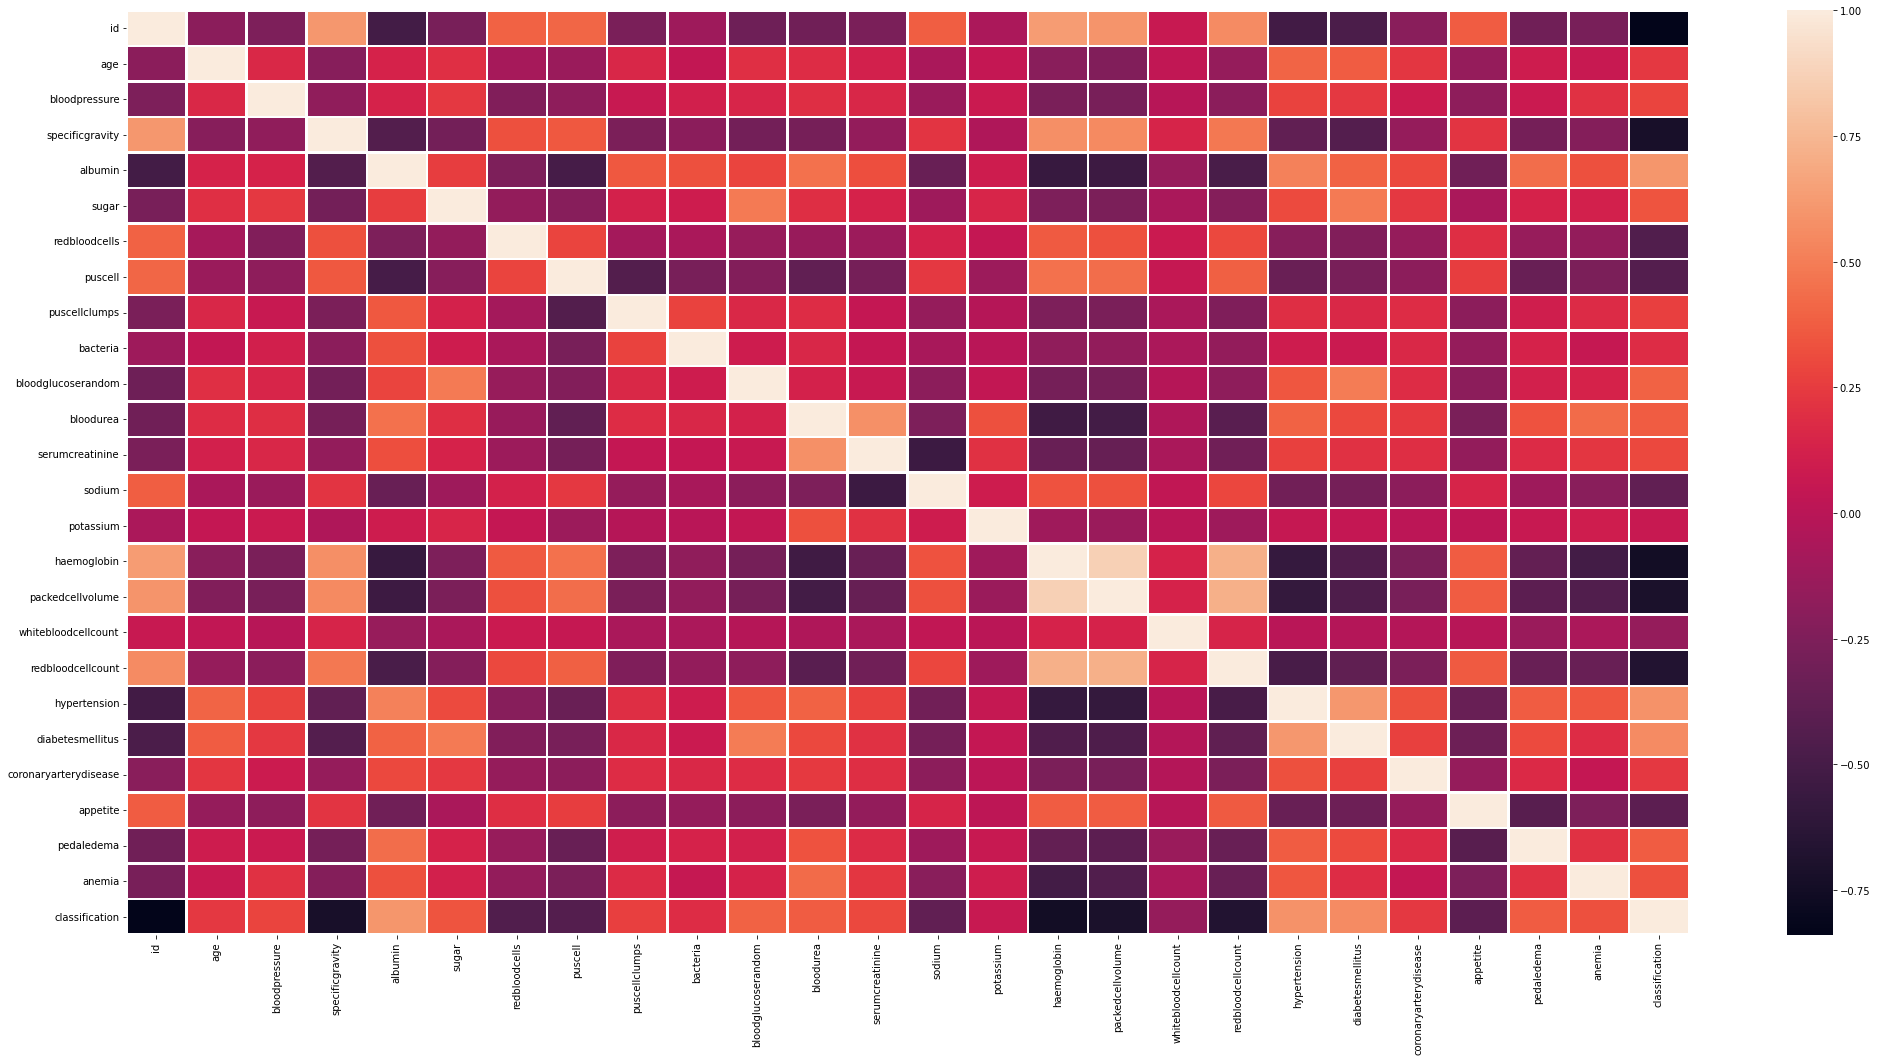

In [ ]:
f= plt.subplots(figsize=(35,17))
corr=df.corr()
corr=(corr)
sns.heatmap(corr,
xticklabels= corr.columns.values,linewidth=1.5,
yticklabels=corr.columns.values)
corr

Now Let Us Build our model To Predict CHRONIC KIDNEY DISEASE

Algorithms we are using are

1)Logistic Regression


Let us implement Logistic Regression From Sctratch as well as from sklearn and let us determine their performence


In [ ]:
X = df[df.columns[0:25]]
y = df[df.columns[25]]

In [ ]:
#Split the data into 70% training and 30% testing 
X_train,  X_test, y_train, y_test = train_test_split( X, y, test_size=1/3,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

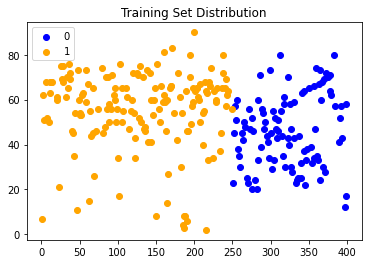

In [ ]:
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='1')
plt.title("Training Set Distribution")
plt.legend();

In [ ]:
class Logisticregression:
    def __init__(self, lr=0.02, num_iter=10000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
           
                
           
               
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)
    
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [ ]:
model = Logisticregression(lr=0.02, num_iter=10000)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


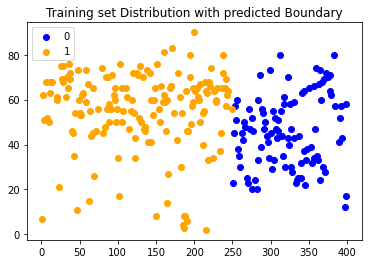

In [ ]:
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='1')
plt.title("Training set Distribution with predicted Boundary")
plt.legend();


In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,Y_pred)
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))

  49   0
   2  83


In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))

False Positives
 [2 0]
False Negetives
 [0 2]
True Positives
 [49 83]
True Negetives
 [83 49]


In [ ]:

TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Acclr = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Acclr))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

Specificity 
 [0.97647059 1.        ]
Precision 
 [0.96078431 1.        ]
Recall 
 [1.         0.97647059]
Áccuracy 
[0.98507463 0.98507463]
FScore 
[0.98       0.98809524]


0.9850746268656716


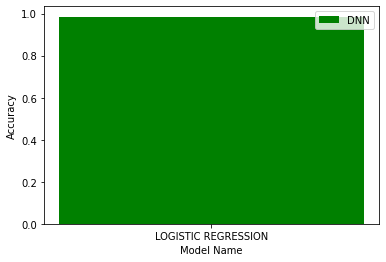

In [ ]:
from sklearn.metrics import accuracy_score
lraccc=accuracy_score(y_test,Y_pred)
print(lraccc)

plt.bar(['LOGISTIC REGRESSION'],[lraccc], label="DNN", color='g')

plt.legend()
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.show()

Let us Implement KNN from  Scratch

In [ ]:

class KNearestNeighbors() :
    def __init__( self, A ) :
        self.A = A
        
    def fit( self, X_train, Y_train ) : 
        self.X_train = X_train 
        self.Y_train = Y_train
        self.m, self.n = X_train.shape
        
    def euclidean( self, x, x_train ) : 
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 
    
    def findNeighbors( self, x ) : 
        euclidean_distances = np.zeros( self.m ) 
        for i in range( self.m ) : 
            d = self.euclidean( x, self.X_train[i] ) 
            euclidean_distances[i] = d 
        inds = euclidean_distances.argsort() 
        Y_train_sorted = self.Y_train[inds] 
        return Y_train_sorted[:self.A] 
   
        
    def predict( self, X_test ) : 
        self.X_test = X_test 
        self.m_test, self.n = X_test.shape 
        Y_predict = np.zeros( self.m_test ) 
        for i in range( self.m_test ) : 
            x = self.X_test[i] 
            neighbors = np.zeros( self.A ) 
            neighbors = self.findNeighbors( x ) 
            Y_predict[i] = mode( neighbors )[0][0]	 
        return Y_predict 

    


In [ ]:
df1=df
print(df1.shape[1])          
  
df1.columns = range(df1.shape[1])


26


In [ ]:
X = df1[df1.columns[0:25]]
y = df1[df1.columns[25]]

In [ ]:
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size =1/3 ,random_state=42) 
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
kmodel = KNearestNeighbors( A = 9 ) 
kmodel.fit( X_train, y_train ) 

In [ ]:
Y_pred = kmodel.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,Y_pred)
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))

  49   0
   3  82


In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))

False Positives
 [3 0]
False Negetives
 [0 3]
True Positives
 [49 82]
True Negetives
 [82 49]


In [ ]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Accknn = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Accknn))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

Specificity 
 [0.96470588 1.        ]
Precision 
 [0.94230769 1.        ]
Recall 
 [1.         0.96470588]
Áccuracy 
[0.97761194 0.97761194]
FScore 
[0.97029703 0.98203593]


0.9776119402985075


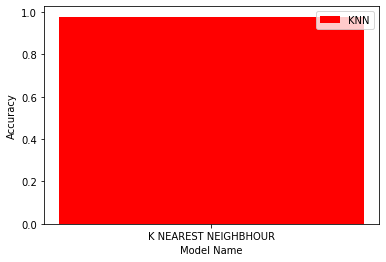

In [ ]:
from sklearn.metrics import accuracy_score
knnaccc=accuracy_score(y_test,Y_pred)
print(knnaccc)
from sklearn.metrics import accuracy_score
lraccc=accuracy_score(y_test,Y_pred)

plt.bar(['K NEAREST NEIGHBHOUR'],[knnaccc], label="KNN", color='r')

plt.legend()
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.show()